# Imports

In [13]:
#import of the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [14]:
# #import of the auction csv file
# path = r'C:\Users\portable\oldtimertrends\auction' # to use it, change set your own path
# all_files = glob.glob(path + "/*.csv")

# #list of csv file
# auction_list = []

# for filename in all_files:
#     #print(filename)
#     df = pd.read_csv(filename, index_col=None, header=0)
#     #print(df.shape)
#     auction_list.append(df)

# df = pd.concat(auction_list, axis=0, ignore_index=True)

# Overview of the DF

In [15]:
df = pd.read_csv('280sl.csv')
df

,auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_price,auction_restauration_code,auction_sales_code,auction_url,model,quote_id,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4175,NaN
1,MERCEDES,13/07/2019,Brooklands,280 SL cabriolet hard-top,Historics at Brooklands,62 410 €,REST,V,NaN,NaN,4175,NaN
2,MERCEDES,29/05/2019,Auburn,280 SL cabriolet hard-top,RM Sotheby's,83 630 €,REST,V,NaN,NaN,4175,NaN
3,MERCEDES,18/05/2019,Brooklands,280 SL cabriolet hard-top RHD,Historics at Brooklands,109 610 €,REST,V,NaN,NaN,4175,NaN
4,MERCEDES,29/03/2019,Fort Lauderdale,280 SL cabriolet hard-top,RM Sotheby,63 640 €,REST,V,NaN,NaN,4175,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
109,MERCEDES,26/07/2006,Buxton,280 SL cabriolet hard-top RHD autom.,H & H Classic Auctions,21 000 €,OR+,V,NaN,NaN,7,NaN
110,MERCEDES,22/07/2006,Nuremberg,"280 SL cabriolet hard-top LHD, jantes alu",Coys Europe,37 000 €,REST+,V,NaN,NaN,7,NaN
111,MERCEDES,07/07/2006,Goodwood,280 SL cabriolet hard-top RHD autom.,Bonhams,8 250 €,OR,V,NaN,NaN,7,NaN
112,MERCEDES,02/04/2006,Fontainebleau,280 SL cabriolet + hard-top LHD,Jean-Pierre Osenat,25 000 €,REST,V,NaN,NaN,7,NaN


In [16]:
#check of the column names
df.columns

Index(['auction_brand', 'auction_date', 'auction_location', 'auction_model',
       'auction_organizor', 'auction_price', 'auction_restauration_code',
       'auction_sales_code', 'auction_url', 'model', 'quote_id', 'year'],
      dtype='object')

# Data cleaning

In [17]:
#remove unecessary column (empty valued)

df = df.drop(columns=['auction_url', 'model','year'])
df = df.dropna()
df = df.drop_duplicates()
print("shape: ",df.shape)
df

shape:  (107, 9)


,auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_price,auction_restauration_code,auction_sales_code,quote_id
1,MERCEDES,13/07/2019,Brooklands,280 SL cabriolet hard-top,Historics at Brooklands,62 410 €,REST,V,4175
2,MERCEDES,29/05/2019,Auburn,280 SL cabriolet hard-top,RM Sotheby's,83 630 €,REST,V,4175
3,MERCEDES,18/05/2019,Brooklands,280 SL cabriolet hard-top RHD,Historics at Brooklands,109 610 €,REST,V,4175
4,MERCEDES,29/03/2019,Fort Lauderdale,280 SL cabriolet hard-top,RM Sotheby,63 640 €,REST,V,4175
5,MERCEDES,29/03/2019,Fort Lauderdale,280 SL cabriolet hard-top automatique,RM Sotheby,44 060 €,REST,V,4175
...,...,...,...,...,...,...,...,...,...
109,MERCEDES,26/07/2006,Buxton,280 SL cabriolet hard-top RHD autom.,H & H Classic Auctions,21 000 €,OR+,V,7
110,MERCEDES,22/07/2006,Nuremberg,"280 SL cabriolet hard-top LHD, jantes alu",Coys Europe,37 000 €,REST+,V,7
111,MERCEDES,07/07/2006,Goodwood,280 SL cabriolet hard-top RHD autom.,Bonhams,8 250 €,OR,V,7
112,MERCEDES,02/04/2006,Fontainebleau,280 SL cabriolet + hard-top LHD,Jean-Pierre Osenat,25 000 €,REST,V,7


In [18]:
## Consistency check on brand colmn
df['auction_brand'].unique()

array(['MERCEDES'], dtype=object)

In [19]:
#Set auction brand column format as String object
df['auction_brand'] = df['auction_brand'].astype(str)

In [20]:
#set the auction date column as a Datetime object
df['auction_date'] = pd.to_datetime(df['auction_date'], format= '%d/%m/%Y')

In [21]:
#set the price column format as a Float object with no currency formating anymore
df = df[df['auction_price'].notna()]
df['auction_price']= df['auction_price'].str.replace(" ", "")
df['auction_price']= df['auction_price'].str.replace("€", "")
df['auction_price'] = df['auction_price'].astype(float)

In [22]:
#type check on the DF + Size check
print (df.dtypes)
print(df.shape)

auction_brand                        object
auction_date                 datetime64[ns]
auction_location                     object
auction_model                        object
auction_organizor                    object
auction_price                       float64
auction_restauration_code            object
auction_sales_code                   object
quote_id                              int64
dtype: object
(107, 9)


In [23]:
#cleaning of location
count_unique_organizor = np.count_nonzero(df.auction_location.unique())
print(count_unique_organizor)
def clean_name(a,b):
    df.auction_location.replace(a,b,inplace=True)

clean_name('AmeliA IslAnd','Amelia Island')
clean_name('Ascot', 'Ascott')
clean_name('Auvers sur Oise','Auvers-sur-Oise')
clean_name('EsvrEs sur IndrE','Esvres sur Indre')
clean_name('Knokke le Zoute', 'Knokke-le-Zoute')
clean_name('Le Plessis Bouchard','Le Plessis-Bouchard')
clean_name('Lyon (Brotteaux)','Lyon')
clean_name("Lyon (Epoqu'auto)",'Lyon')
clean_name("Lyon-Chassieu",'Lyon')
clean_name('Montastruc', 'Montastruc-la-Conseillère')
clean_name('Montastruc la Conseillère', 'Montastruc-la-Conseillère')
clean_name('Montastruc la conseillère', 'Montastruc-la-Conseillère')
clean_name('OxfOrd', 'Oxford')
clean_name('Paris (Bonhams)','Paris')
clean_name('RomoRantin', 'Romorantin')
clean_name('Saint-LoubèS','Saint-Loubès')
clean_name('Salzburg',  'Salzbourg')
clean_name('Zürich',  'Zurich')
clean_name('ESVRES SUR INDRE', 'ESVRES-SUR-INDRE')
clean_name('JOUY SUR MORIN', 'JOUY-SUR-MORIN')
clean_name('KNOKKE LE ZOUTE', 'KNOKKE-LE-ZOUTE')
clean_name('LE PLESSIS BOUCHARD','LE PLESSIS-BOUCHARD')
clean_name('LYON (BROTTEAUX)','LYON')
clean_name("LYON (EPOQU'AUTO)",'LYON')
clean_name("LYON-CHASSIEU",'LYON')
clean_name('MONACO (BONHAMS)','MONACO')
clean_name('MONACO (COYS)','MONACO')
clean_name('NEUILLY','NEUILLY SUR SEINE')
clean_name('NOGENT LE ROTROU','NOGENT-LE-ROTROU')
clean_name('PARIS (ARTCURIAL)','PARIS')
clean_name('PARIS (BONHAMS)','PARIS')
clean_name('PHOENIX (ARIZONA)','PHOENIX')
clean_name('SCOTTSDALE (ARIZONA)','SCOTTSDALE')
clean_name('STONELEIGH PARK','STONELEIGH')
clean_name('CARMEL (QUAIL LODGE)','CARMEL')
clean_name('LONDON','LONDRES')
clean_name('ROMORANTIN-LANTHENAY','ROMORANTIN')


df.auction_location = df.auction_location.str.upper()          
sorted(df.auction_location.unique())
count_unique_organizor = np.count_nonzero(df.auction_location.unique())
print(count_unique_organizor)

44
41


In [24]:
count_unique_organizor_a = np.count_nonzero(df.auction_organizor.unique())
count_unique_rc_a = np.count_nonzero(df.auction_restauration_code.unique())
print(count_unique_organizor_a)
print(count_unique_rc_a)


28
10


In [25]:
# df.auction_organizor.str.replace(r'(^.*RM.*$)', 'RM Sothebys')

df.auction_organizor = df.auction_organizor.apply(lambda x: "RM Sotheby's" if "RM" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Bonhams" if "Bonhams" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Artcurial" if "Artcurial" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "H & H Classic Auctions" if "H and H" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "H & H Classic Auctions" if "H & H" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Gooding & Co" if "Gooding" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Alcopa auction" if "Alcopa" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "SVV" if "SVV" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Oldtimer Galerie Toffen " if "Oldtimer Galerie" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Coys Auction " if "Coys" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "HdV" if "Hdv" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "HdV" if "HdV" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "HdV" if "HDV" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Barons Auctions" if "Barons" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Brooklands Auctions" if "Brooklands" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Armor Enchères" if "Armor Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "BCA" if "BCA" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Besch" if "Besch" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Briscadieu" if "Briscadieu" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Caen Enchères" if "Caen Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Christie's" if "Christie" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Caen Enchères" if "Caen Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Cyril Duvals" if "Cyril Duval" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Caen Enchères" if "Caen Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Dorotheum" if "Dorotheum" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "FEE Machoir" if "FEE Machoir" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Five Auction Tours" if "Five Auction Tours" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Hôtel des Ventes" if "Hôtel des Ventes" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "J.P. Osenat" if "J" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Leclère" if "Leclère" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Lisieux Enchères" if "Lisieux Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Marie Line Balsan" if "Marie Line Balsan" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Me Arnaud-Lacroz" if "Me Arnaud-Lacroz" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Me Arnaud-Lacroz" if "Lacroz" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Leclère" if "Leclère" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Montargis Enchères" if "Montargis" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Orne Enchères" if "Orne Enchères" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "SCP" if "SCP" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "SdV" if "SdV" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Silverstone Auctions" if "Silverstone" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "The Sportscar Auction Co." if "The Sportscar Auction" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Toutain-Vente" if "Toutain-Vente" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "FEE Machoïr" if "Machoïr" in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "Hôtel des Ventes" if 'Hôtel des Ventes' in x else x)
df.auction_organizor = df.auction_organizor.apply(lambda x: "AmeliA IslAnd" if'Amelia Island' in x else x)


In [26]:
count_unique_organizor_b = np.count_nonzero(df.auction_organizor.unique())
count_unique_organizor_b

20

In [27]:
# plt.figure(figsize=(20,15))
# y_pos = df['auction_organizor'].value_counts().plot(kind='bar')
# plt.title('AuctionBrands Histogram')
# plt.xlim([0,20])
# plt.set(xlabel = 'Car Brand', ylabel='Frequency of auction_organizor')

In [28]:
#preparation for dummy variables
values = pd.Series(df.auction_organizor)
counts = pd.value_counts(values)
mask = values.isin(counts[counts > 25].index)
applied_mask = values[mask]
sorted(applied_mask.unique())
applied_mask= np.count_nonzero(applied_mask.unique())
print("Number of distinct auction organizors where the number of auction is higher to 25 auctions : {}".format(applied_mask))

Number of distinct auction organizors where the number of auction is higher to 25 auctions : 1


In [29]:
#Price column description 
df.auction_price.describe()

count       107.000000
mean      72081.336449
std       47522.229850
min        3599.000000
25%       35175.000000
50%       65810.000000
75%       92955.000000
max      230000.000000
Name: auction_price, dtype: float64

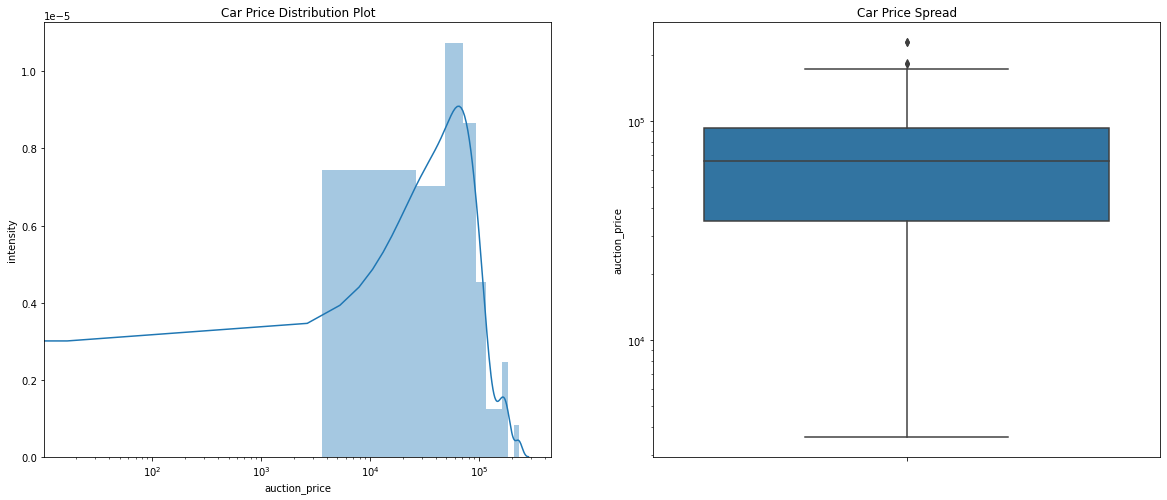

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
ax = sns.distplot(df.auction_price)
ax.set(ylabel='intensity')
ax.set_xscale("log")
plt.subplot(1,2,2)
plt.title('Car Price Spread')
g = sns.boxplot(y = df.auction_price)
g.set_yscale("log")
plt.show()

In [31]:
df = df.loc[(df!=0.00).any(1)]
df.shape

(107, 9)

sorted(df.auction_model.unique())

In [32]:
np.count_nonzero(df.quote_id.unique())

7

In [33]:
df.columns

Index(['auction_brand', 'auction_date', 'auction_location', 'auction_model',
       'auction_organizor', 'auction_price', 'auction_restauration_code',
       'auction_sales_code', 'quote_id'],
      dtype='object')

# Data vizualization

In [34]:
print("Mean:",df.auction_price.mean())
print("Std:",df.auction_price.max())
print("Min:",df.auction_price.min())
print("Median:",df.auction_price.median())
print(df.auction_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

Mean: 72081.33644859813
Std: 230000.0
Min: 3599.0
Median: 65810.0
count       107.000000
mean      72081.336449
std       47522.229850
min        3599.000000
25%       35175.000000
50%       65810.000000
75%       92955.000000
85%      109830.200000
90%      135780.000000
100%     230000.000000
max      230000.000000
Name: auction_price, dtype: float64


[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car Brand')]

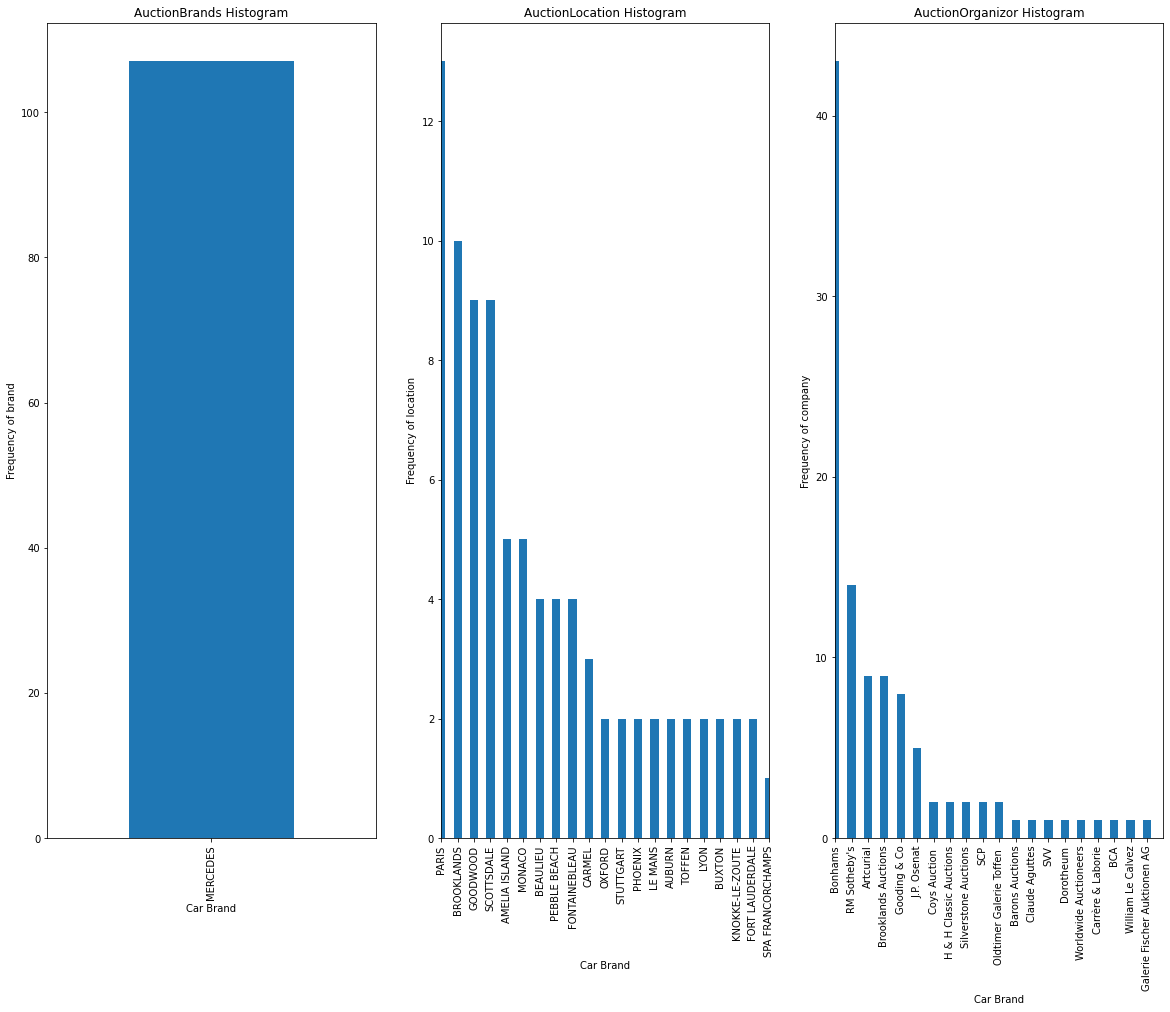

In [35]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
plt1 = df['auction_brand'].value_counts().plot(kind='bar')
plt.title('AuctionBrands Histogram')
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of brand')

plt.subplot(1,3,2)

plt1 = df['auction_location'].value_counts().plot(kind='bar')
plt.title('AuctionLocation Histogram')
plt.xlim([0, 20])
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of location')

plt.subplot(1,3,3)

plt1 = df['auction_organizor'].value_counts().plot(kind='bar')
plt.title('AuctionOrganizor Histogram')
plt.xlim([0, 20])
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of company')



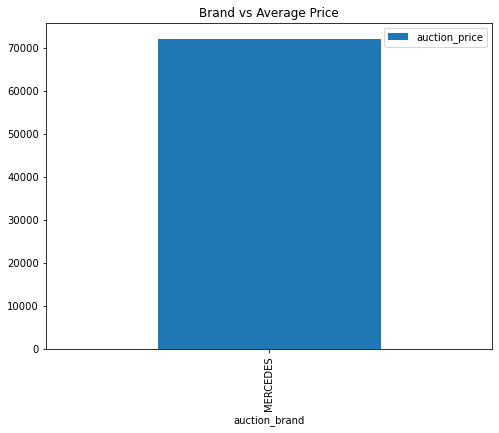

In [36]:
dff = pd.DataFrame(df.groupby(['auction_brand'])['auction_price'].mean().sort_values(ascending = False))
dff.plot.bar(figsize=(8,6))
plt.title('Brand vs Average Price')
plt.show()

# TO_CSV 

In [37]:
df.to_csv("280sl_full_auction_cleaned.csv", encoding='utf-8',date_format='%Y%m%d', index=False)

In [38]:
dff =pd.read_csv("280sl_full_auction_cleaned.csv")

In [39]:
dff

,auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_price,auction_restauration_code,auction_sales_code,quote_id
0,MERCEDES,20190713,BROOKLANDS,280 SL cabriolet hard-top,Brooklands Auctions,62410.0,REST,V,4175
1,MERCEDES,20190529,AUBURN,280 SL cabriolet hard-top,RM Sotheby's,83630.0,REST,V,4175
2,MERCEDES,20190518,BROOKLANDS,280 SL cabriolet hard-top RHD,Brooklands Auctions,109610.0,REST,V,4175
3,MERCEDES,20190329,FORT LAUDERDALE,280 SL cabriolet hard-top,RM Sotheby's,63640.0,REST,V,4175
4,MERCEDES,20190329,FORT LAUDERDALE,280 SL cabriolet hard-top automatique,RM Sotheby's,44060.0,REST,V,4175
...,...,...,...,...,...,...,...,...,...
102,MERCEDES,20060726,BUXTON,280 SL cabriolet hard-top RHD autom.,H & H Classic Auctions,21000.0,OR+,V,7
103,MERCEDES,20060722,NUREMBERG,"280 SL cabriolet hard-top LHD, jantes alu",Coys Auction,37000.0,REST+,V,7
104,MERCEDES,20060707,GOODWOOD,280 SL cabriolet hard-top RHD autom.,Bonhams,8250.0,OR,V,7
105,MERCEDES,20060402,FONTAINEBLEAU,280 SL cabriolet + hard-top LHD,J.P. Osenat,25000.0,REST,V,7
